In [1]:
import shap
import pickle
import pandas as pd
import numpy as np
import tensorflow.keras.backend as K
from tensorflow import keras 
import tensorflow as tf
import scipy.stats as st
from numpy import mean
from numpy import std
from tensorflow.keras.metrics import binary_accuracy
from sklearn.metrics import roc_auc_score, fbeta_score, recall_score, precision_score, accuracy_score
import seaborn as sns
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as statsmodels
import statsmodels.stats.multitest as multitest
import copy

import sklearn
import scipy
import seaborn as sns
plt.style.use('seaborn-ticks')

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#load train and test data CCS

x_train = np.loadtxt('20210429_CRT_CCS_xtrain.txt')
x_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
y_train = np.loadtxt('20210429_CRT_CCS_ytrain.txt')
y_test = np.loadtxt('20210429_CRT_CCS_ytest.txt')
x_val = np.loadtxt('20210429_CRT_CCS_xval.txt')
y_val = np.loadtxt('20210429_CRT_CCS_yval.txt')


In [54]:
#load train and test data mamu
x_train = np.loadtxt('20201230_all5_xtrain.txt')
x_val = np.loadtxt('20201230_all5_xval.txt')
y_train = np.loadtxt('20201230_all5_ytrain.txt')
y_val = np.loadtxt('20201230_all5_yval.txt')

x_test = np.loadtxt('20201230_all5_xtest.txt')
y_test = np.loadtxt('20201230_all5_ytest.txt')



y_train = y_train[:,0]
y_val = y_val[:,0]

y_test = y_test[:,0]

In [53]:
len(y_train)

43923

In [55]:
## try many models
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
#model_dict = {
#    'dummy': DummyRegressor(),
#    'linear': LinearRegression(),
#    'lasso' : Lasso(),
#    'elastic': ElasticNet(),
#    'ridge': Ridge(),
#    'Sup Vec Regr': MultiOutputRegressor(SVR()),
#    'M/O adaB': MultiOutputRegressor(AdaBoostRegressor()),
#    'M/O gboost': MultiOutputRegressor(GradientBoostingRegressor()) , 
#    'ExtraTrees': ExtraTreesRegressor(),
#    'RandomForest' : RandomForestRegressor()
#}
lin = LinearRegression()
lin.fit(x_train, y_train)

las = Lasso()
las.fit(x_train, y_train)

etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

0.3054877157451907
[[0.30548772 0.31427032 0.31294761 ... 0.32185758 0.33415323 0.33300688]
 [0.0599     0.2049     0.1151     ... 0.4421     0.1409     0.3085    ]]


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


SpearmanrResult(correlation=0.2853015033137805, pvalue=6.873058013400692e-116)


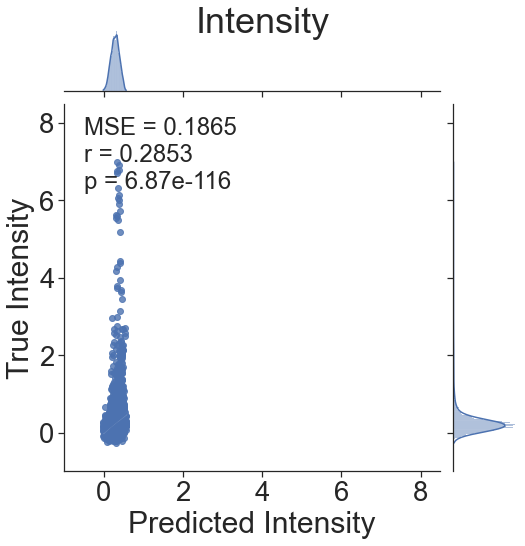

In [61]:
y_pred = lin.predict(x_test)
mamu = []
mamupred = []



for value in y_pred:
    mamupred.append(value)

print(mamupred[0])
    
mamureal = []
for value in y_test:
    mamureal.append(value)

    
mamu.append(mamupred)
mamu.append(mamureal)
print(np.asarray(mamu))
dmamu = {'Predicted Intensity': mamupred, 'True Intensity': mamureal}





dfmamu = pd.DataFrame(data = dmamu)



j.fig.set_figwidth(8.5)
j.fig.set_figheight(8)


#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = dfmamu, kind='reg',color='b', height=8, xlim = (-1,8.5), ylim = (-1,8.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("Intensity")
prmamu, pmamu = scipy.stats.spearmanr(mamupred, mamureal)
print(scipy.stats.spearmanr(mamupred, mamureal))
msemamu=round(sklearn.metrics.mean_squared_error(mamupred, mamureal),4)
j.ax_joint.text(-0.5,7.7,"MSE = " + str(msemamu), fontsize=24)
j.ax_joint.text(-0.5,7,"r = " + str(round(prmamu,4)), fontsize=24)
if pmamu == 0:
    j.ax_joint.text(-0.5,6.3,"p = 2.225e-308", fontsize=24)
else:
    j.ax_joint.text(-0.5,6.3,"p = " + "{:.2e}".format(pmamu), fontsize=24)

#2.225e-308
j.ax_joint.set_xticks([0, 2, 4, 6, 8])
j.ax_joint.set_xticklabels(['0','2','4', '6', '8'])

j.ax_joint.set_yticks([0, 2, 4, 6, 8])
j.ax_joint.set_yticklabels(['0','2','4', '6', '8'])


plt.savefig('mamua001realvspredicted_lin.png')
plt.savefig('mamua001realvspredicted_lin.svg')
plt.show()


In [65]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(x_train), 100)
explainer = shap.KernelExplainer(lin.predict, x_trainmeans)
shap_values = explainer.shap_values(np.asarray(x_test))
with open("shapvalues_mamu_lin.pkl","wb") as f:
    pickle.dump(shap_values,f)

0.290982362315871
[[0.29098236 0.29098236 0.29098236 ... 0.29098236 0.29098236 0.29098236]
 [0.0599     0.2049     0.1151     ... 0.4421     0.1409     0.3085    ]]


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Dataset has 0 variance; skipping density estimate.
An input array is constant; the correlation coefficent is not defined.


SpearmanrResult(correlation=nan, pvalue=nan)


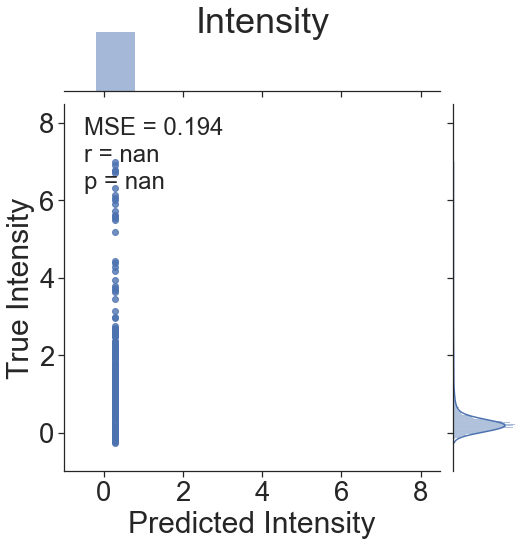

In [62]:
y_pred = las.predict(x_test)
mamu = []
mamupred = []



for value in y_pred:
    mamupred.append(value)

print(mamupred[0])
    
mamureal = []
for value in y_test:
    mamureal.append(value)

    
mamu.append(mamupred)
mamu.append(mamureal)
print(np.asarray(mamu))
dmamu = {'Predicted Intensity': mamupred, 'True Intensity': mamureal}





dfmamu = pd.DataFrame(data = dmamu)



j.fig.set_figwidth(8.5)
j.fig.set_figheight(8)


#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = dfmamu, kind='reg',color='b', height=8, xlim = (-1,8.5), ylim = (-1,8.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("Intensity")
prmamu, pmamu = scipy.stats.spearmanr(mamupred, mamureal)
print(scipy.stats.spearmanr(mamupred, mamureal))
msemamu=round(sklearn.metrics.mean_squared_error(mamupred, mamureal),4)
j.ax_joint.text(-0.5,7.7,"MSE = " + str(msemamu), fontsize=24)
j.ax_joint.text(-0.5,7,"r = " + str(round(prmamu,4)), fontsize=24)
if pmamu == 0:
    j.ax_joint.text(-0.5,6.3,"p = 2.225e-308", fontsize=24)
else:
    j.ax_joint.text(-0.5,6.3,"p = " + "{:.2e}".format(pmamu), fontsize=24)

#2.225e-308
j.ax_joint.set_xticks([0, 2, 4, 6, 8])
j.ax_joint.set_xticklabels(['0','2','4', '6', '8'])

j.ax_joint.set_yticks([0, 2, 4, 6, 8])
j.ax_joint.set_yticklabels(['0','2','4', '6', '8'])


plt.savefig('mamua001realvspredicted_lasso.png')
plt.savefig('mamua001realvspredicted_lasso.svg')
plt.show()


In [ ]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(x_train), 100)
explainer = shap.KernelExplainer(las.predict, x_trainmeans)
shap_values = explainer.shap_values(np.asarray(x_test))
with open("shapvalues_mamu_lasso.pkl","wb") as f:
    pickle.dump(shap_values,f)

0.20457399999999995
[[0.204574 0.234947 0.249757 ... 0.232655 0.33003  0.310133]
 [0.0599   0.2049   0.1151   ... 0.4421   0.1409   0.3085  ]]


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


SpearmanrResult(correlation=0.5519548383012225, pvalue=0.0)


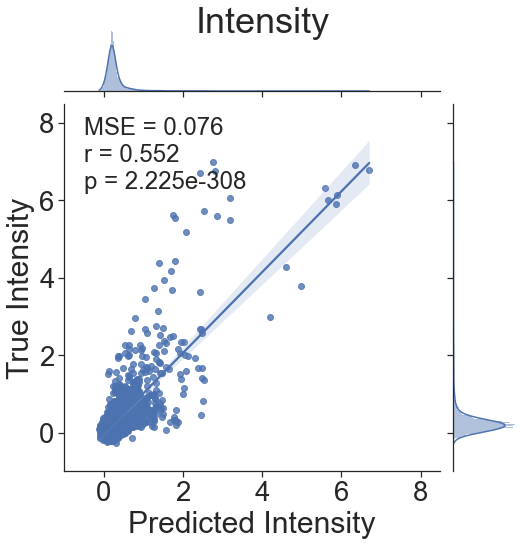

In [63]:
y_pred = etr.predict(x_test)
mamu = []
mamupred = []



for value in y_pred:
    mamupred.append(value)

print(mamupred[0])
    
mamureal = []
for value in y_test:
    mamureal.append(value)

    
mamu.append(mamupred)
mamu.append(mamureal)
print(np.asarray(mamu))
dmamu = {'Predicted Intensity': mamupred, 'True Intensity': mamureal}





dfmamu = pd.DataFrame(data = dmamu)



j.fig.set_figwidth(8.5)
j.fig.set_figheight(8)


#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = dfmamu, kind='reg',color='b', height=8, xlim = (-1,8.5), ylim = (-1,8.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("Intensity")
prmamu, pmamu = scipy.stats.spearmanr(mamupred, mamureal)
print(scipy.stats.spearmanr(mamupred, mamureal))
msemamu=round(sklearn.metrics.mean_squared_error(mamupred, mamureal),4)
j.ax_joint.text(-0.5,7.7,"MSE = " + str(msemamu), fontsize=24)
j.ax_joint.text(-0.5,7,"r = " + str(round(prmamu,4)), fontsize=24)
if pmamu == 0:
    j.ax_joint.text(-0.5,6.3,"p = 2.225e-308", fontsize=24)
else:
    j.ax_joint.text(-0.5,6.3,"p = " + "{:.2e}".format(pmamu), fontsize=24)

#2.225e-308
j.ax_joint.set_xticks([0, 2, 4, 6, 8])
j.ax_joint.set_xticklabels(['0','2','4', '6', '8'])

j.ax_joint.set_yticks([0, 2, 4, 6, 8])
j.ax_joint.set_yticklabels(['0','2','4', '6', '8'])


plt.savefig('mamua001realvspredicted_etr.png')
plt.savefig('mamua001realvspredicted_etr.svg')
plt.show()


In [66]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(x_train), 100)
explainer = shap.KernelExplainer(etr.predict, x_trainmeans)
shap_values = explainer.shap_values(np.asarray(x_test))
with open("shapvalues_mamu_etr.pkl","wb") as f:
    pickle.dump(shap_values,f)

0.1917699
[[0.1917699  0.22918628 0.21511291 ... 0.19897979 0.17192596 0.19300926]
 [0.0599     0.2049     0.1151     ... 0.4421     0.1409     0.3085    ]]


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


SpearmanrResult(correlation=0.5498463851555175, pvalue=0.0)


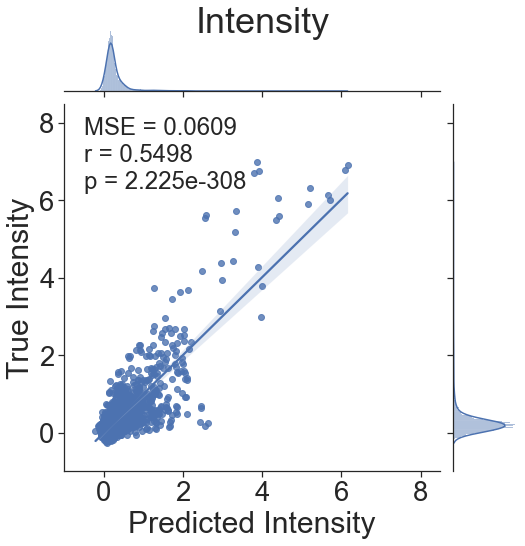

In [64]:
y_pred = xgb.predict(x_test)
mamu = []
mamupred = []



for value in y_pred:
    mamupred.append(value)

print(mamupred[0])
    
mamureal = []
for value in y_test:
    mamureal.append(value)

    
mamu.append(mamupred)
mamu.append(mamureal)
print(np.asarray(mamu))
dmamu = {'Predicted Intensity': mamupred, 'True Intensity': mamureal}





dfmamu = pd.DataFrame(data = dmamu)



j.fig.set_figwidth(8.5)
j.fig.set_figheight(8)


#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = dfmamu, kind='reg',color='b', height=8, xlim = (-1,8.5), ylim = (-1,8.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("Intensity")
prmamu, pmamu = scipy.stats.spearmanr(mamupred, mamureal)
print(scipy.stats.spearmanr(mamupred, mamureal))
msemamu=round(sklearn.metrics.mean_squared_error(mamupred, mamureal),4)
j.ax_joint.text(-0.5,7.7,"MSE = " + str(msemamu), fontsize=24)
j.ax_joint.text(-0.5,7,"r = " + str(round(prmamu,4)), fontsize=24)
if pmamu == 0:
    j.ax_joint.text(-0.5,6.3,"p = 2.225e-308", fontsize=24)
else:
    j.ax_joint.text(-0.5,6.3,"p = " + "{:.2e}".format(pmamu), fontsize=24)

#2.225e-308
j.ax_joint.set_xticks([0, 2, 4, 6, 8])
j.ax_joint.set_xticklabels(['0','2','4', '6', '8'])

j.ax_joint.set_yticks([0, 2, 4, 6, 8])
j.ax_joint.set_yticklabels(['0','2','4', '6', '8'])


plt.savefig('mamua001realvspredicted_xgb.png')
plt.savefig('mamua001realvspredicted_xgb.svg')
plt.show()


In [67]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(x_train), 100)
explainer = shap.KernelExplainer(xgb.predict, x_trainmeans)
shap_values = explainer.shap_values(np.asarray(x_test))
with open("shapvalues_mamu_xgb.pkl","wb") as f:
    pickle.dump(shap_values,f)

In [ ]:
y_pred = xgb.predict(x_test)
ccs = []
CCSpred = []



for value in y_pred:
    CCSpred.append(value)

print(CCSpred[0])
    
CCSreal = []
for value in y_test:
    CCSreal.append(value)

    
ccs.append(CCSpred)
ccs.append(CCSreal)
print(np.asarray(ccs))
dccs = {'Predicted CCS': CCSpred, 'True CCS': CCSreal}





dfccs = pd.DataFrame(data = dccs)





#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted CCS', 'True CCS', data = dfccs, kind='reg',color='y', height=8, xlim = (225,525), ylim = (225,525))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("CCS")
prCCS, pCCS = scipy.stats.spearmanr(CCSpred, CCSreal)
print(scipy.stats.spearmanr(CCSpred, CCSreal))
mseCCS=round(sklearn.metrics.mean_squared_error(CCSpred, CCSreal),4)
j.ax_joint.text(235,500,"MSE = " + str(mseCCS), fontsize=24)
j.ax_joint.text(235,475,"r = " + str(round(prCCS,4)), fontsize=24)
if pCCS == 0:
    j.ax_joint.text(235,450,"p < 2.225e-308 ", fontsize=24)
else:
    j.ax_joint.text(235,450,"p = " + "{:.3e}".format(pCCS), fontsize=24)

j.ax_joint.set_xticks([300, 400, 500])
j.ax_joint.set_xticklabels(['300','400','500'])

j.ax_joint.set_yticks([300, 400, 500])
j.ax_joint.set_yticklabels(['300','400','500'])

j.fig.set_figwidth(8.5)
j.fig.set_figheight(8)

plt.savefig('CCSrealvspredicted_xgb.png')
plt.savefig('CCSrealvspredicted_xgb.svg')
plt.show()
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(x_train), 100)
explainer = shap.KernelExplainer(xgb.predict, x_trainmeans)
shap_values = explainer.shap_values(np.asarray(x_test))
with open("shapvalues_CCS_xgb.pkl","wb") as f:
    pickle.dump(shap_values,f)